# Practice

### Handling missing values

In [1]:
#Импортируем необходимые библиотеки
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy.stats import t
import warnings
#Новая библиотека с выделенными функциями
import grandtools as gt
warnings.filterwarnings('ignore')

### 2.1.1 EM for bivariate Gaussian data

In [2]:
#R1
n=100
r=math.floor(n*0.3)
mu=[5, -1]
Sigma=[[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.seed(50)
random.shuffle(h)
for i in range(len(h)):
    if h[i]==0:
        Y[i,1]=None

In [3]:
#R2
hat_mu1=(1/n)*sum(Y[:,0])
def estimators(a):
    y1_bar=np.mean(a[:,0])
    y2_bar=np.mean(a[:,1])
    s11=np.mean((a[:,0]-y1_bar)**2)
    s22=np.mean((a[:,1]-y2_bar)**2)
    s12=np.mean((a[:,0]-y1_bar)*(a[:,1]-y2_bar))
    return y1_bar, y2_bar, s11, s22, s12
y1_bar, y2_bar, s11, s22, s12 = estimators(gt.cleared_arr(Y))
hat_beta_21_1=s12/s11
hat_beta_20_1 = y2_bar-hat_beta_21_1*y1_bar
hat_mu2=hat_beta_21_1*hat_mu1+hat_beta_20_1
res_ml=(hat_mu1,hat_mu2)

In [4]:
#R3
def Estep(Y,mu,Sigma):
    n=len(Y)
    sigma_22_1=Sigma[1,1]-(Sigma[0,1]**2)/Sigma[0,0]
    beta_21_1=Sigma[0,1]/Sigma[0,0]
    beta_20_1=mu[1]-beta_21_1*mu[0]
    E_y2=np.zeros(n)
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            E_y2[i]=beta_20_1+beta_21_1*Y[i,0]
        else:
            E_y2[i]=Y[i,1]
    E_y1=Y[:,0].copy()
    E_y2_y2=np.zeros(n)
    for i in range(len(E_y2)):
        if np.isnan(Y[i,1])==True:
            E_y2_y2[i]=E_y2[i]**2+sigma_22_1
        else: 
            E_y2_y2[i]=E_y2[i]**2
    E_y1_y1=Y[:,0]**2
    E_y1_y2=np.zeros(n)
    E_y1_y2=E_y2*E_y1
    return sum(E_y1), sum(E_y2), sum(E_y1_y1), sum(E_y1_y2), sum(E_y2_y2)
# s1, s2, s11, s12, s22
def Mstep(Y, s1, s2, s11, s12, s22):
    n=len(Y)
    mu1=s1/n
    mu2=s2/n
    sigma1=s11/n-mu1**2
    sigma2=s22/n-mu2**2
    sigma12=s12/n-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[sigma1,sigma12],[sigma12,sigma2]],dtype=np.float64)
    return mu,Sigma
            
    



In [5]:
#R4
def initEM(Y):
    n=len(Y)
    mv=0
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            mv+=1
    r=n-mv
    mu1=np.mean(Y[:,0])
    Z=Y[:,1]
    Z0=list()
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==False:
            Z0.append(Y[i,0])
    Z = Z[~np.isnan(Z)]
    mu2=np.mean(Z)
    s1=np.mean(Y[:,0]**2)-mu1**2
    s2=np.mean(Z)-mu2**2
    s12=np.mean(Z0*Z)-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[s1,s12],[s12,s2]],dtype=np.float64)
    return mu,Sigma
    


mu: [ 5.12075139 -1.019732  ] 
 Sigma: [[ 1.07168215  0.39459383]
 [ 0.39459383 -2.05958534]]


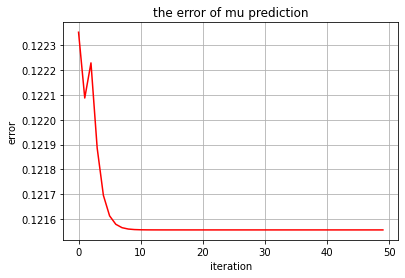

In [6]:
#R5
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
hat_Sigma=i_Sigma.copy()
print('mu:',i_mu,'\n','Sigma:',i_Sigma)
error_mu=np.zeros(50)

for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu-mu)**2))
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
plt.plot(list(error_mu),color='red')
plt.title('the error of mu prediction')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid()
plt.show()
    


In [7]:
#R6
resEM=hat_mu
print('res_ml',res_ml)
print('resEM',resEM)

res_ml (5.120751389362507, -0.9860370398553251)
resEM [ 5.12075139 -0.98603704]


In [8]:
#Q7
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
old_hat_mu=old_old_hat_mu=0
hat_Sigma=i_Sigma.copy()
error_mu=np.zeros(20)
for i in range(20):
    old_old_hat_mu=old_hat_mu
    old_hat_mu=hat_mu
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
    if (i>=3):
        print('Iteration=',i,", Convergence rate of mu2 =",(hat_mu-old_hat_mu)[1]/(old_hat_mu-old_old_hat_mu)[1],'\n')
num_miss=0
num=len(Y[:,1])
for i in range(len(Y)):
    if np.isnan(Y[i,1]):
        num_miss+=1
print("Percentage of missingness is:", num_miss/num)

Iteration= 3 , Convergence rate of mu2 = 0.6203174109071671 

Iteration= 4 , Convergence rate of mu2 = 0.46541552859891855 

Iteration= 5 , Convergence rate of mu2 = 0.4240428381004964 

Iteration= 6 , Convergence rate of mu2 = 0.40787786181251967 

Iteration= 7 , Convergence rate of mu2 = 0.4006709847381559 

Iteration= 8 , Convergence rate of mu2 = 0.39727049868007247 

Iteration= 9 , Convergence rate of mu2 = 0.39562317594503643 

Iteration= 10 , Convergence rate of mu2 = 0.394814968944678 

Iteration= 11 , Convergence rate of mu2 = 0.3944159817956884 

Iteration= 12 , Convergence rate of mu2 = 0.39421841034471394 

Iteration= 13 , Convergence rate of mu2 = 0.394120430143916 

Iteration= 14 , Convergence rate of mu2 = 0.39407180049415935 

Iteration= 15 , Convergence rate of mu2 = 0.39404765476400455 

Iteration= 16 , Convergence rate of mu2 = 0.3940356821609622 

Iteration= 17 , Convergence rate of mu2 = 0.39402968646224545 

Iteration= 18 , Convergence rate of mu2 = 0.394026801381

In [9]:
#R7-1
n = 100
r = math.floor(n*0.3)
mu = [5, -1]
Sigma = [[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.shuffle(h)
Y1=Y.copy()
for i in range(len(h)):
    if h[i]==0:
        Y1[i,1]=None
Y2=Y.copy()
MinValueToDelete=np.flip(np.sort(Y[:,1]))[29]
deletescore=0
for i in range(len(Y2)):
    if deletescore<30 and Y2[i,1]>=MinValueToDelete:
        Y2[i,1]=None


In [10]:
#R7-2
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma

#MAR
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y1, hat_mu_MAR, hat_Sigma_MAR)
    hat_mu_MAR, hat_Sigma_MAR=Mstep(Y1, s1, s2, s11, s22, s12)


#MNAR
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MNAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y2, hat_mu_MNAR, hat_Sigma_MNAR)
    hat_mu_MNAR, hat_Sigma_MNAR=Mstep(Y2, s1, s2, s11, s22, s12)

print('hat_mu_MAR:',hat_mu_MAR)
print('hat_mu_MNAR:',hat_mu_MNAR)
print('hat_Sigma_MAR:',hat_Sigma_MAR)
print('hat_Sigma_MNAR:',hat_Sigma_MNAR)

hat_mu_MAR: [ 5.0736665  -1.94573329]
hat_mu_MNAR: [ 5.0736665  -0.41512838]
hat_Sigma_MAR: [[ 1.27428505 12.12472333]
 [12.12472333 -9.56743217]]
hat_Sigma_MNAR: [[ 1.27428505  4.97863591]
 [ 4.97863591 -0.02173493]]


### 3 Single imputation

### 3.1 Single imputation with the means or with regression - bivariate case

In [11]:
n=100

In [12]:
don, donmiss = gt.data_maker()

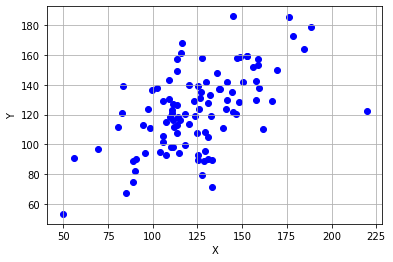

In [13]:
#Визуализация полных данных
plt.scatter(don[:,0],don[:,1],color='blue')
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
d_miss=np.zeros((73,2))
d_obs=np.zeros((27,2))
k1=0
k2=0
for i in range(len(donmiss)):
    if np.isnan(donmiss[i,1]):
        d_miss[k1]=[donmiss[i,0],d1]
        k1+=1
    else:
        d_obs[k2]=donmiss[i]
        k2+=1

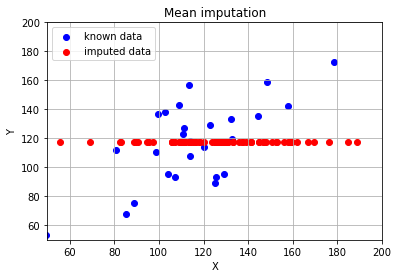

In [15]:
# Визуализация заполнения средними (Mean imputation)
gt.plot_maker(d_obs[:,0],d_obs[:,1],d_miss[:,0],d_miss[:,1],"Mean imputation")

In [16]:
reg = linear_model.LinearRegression()
reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
e_miss=np.zeros((73,2))
k3=0
for i in range(len(donmiss)):
    if np.isnan(donmiss[i,1]):
        e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
        k3+=1

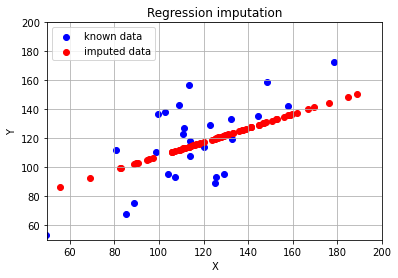

In [17]:
# Визуализация заполнения по регрессии (Regression imputation)
gt.plot_maker(d_obs[:,0],d_obs[:,1],e_miss[:,0],e_miss[:,1],"Regression imputation")

In [18]:
m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
sigma=np.sqrt(np.var(d_obs[:,1]))
stch_impute=gt.gaussian_noise(m_miss,mu=0,std=sigma)

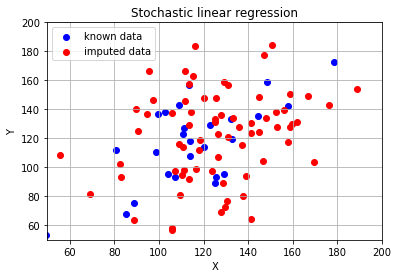

In [19]:
# Визуализация стохастического заполнения по регрессии (Stochastic regression imputation)
gt.plot_maker(d_obs[:,0],d_obs[:,1],e_miss[:,0],stch_impute,"Stochastic linear regression")

In [20]:
imputed_data=np.array([list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])

In [21]:
def results_maker(X):
    d=np.zeros((7,3))
    for i in range(3):
        d[0,i]=np.mean(X[i])
        d[1,i]=np.sqrt(np.var(X[i]))
        d[2,i]=np.corrcoef(X[i],don[:,0])[0,1]
        d[3,i]=d[0,i]-d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[4,i]=d[0,i]+d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[5,i]=d[4,i]-d[3,i]
        d[6,i]=int(d[4,i]>125 and 125>d[3,i])
    return d

In [22]:
results=results_maker(imputed_data)

In [23]:
def SimuMiss():
    don, donmiss = gt.data_maker()
    d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
    d_miss=np.zeros((73,2))
    d_obs=np.zeros((27,2))
    k1=0
    k2=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            d_miss[k1]=[donmiss[i,0],d1]
            k1+=1
        else:
            d_obs[k2]=donmiss[i]
            k2+=1
    reg = linear_model.LinearRegression()
    reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
    e_miss=np.zeros((73,2))
    k3=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
            k3+=1
    m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
    m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
    #sigma=np.sqrt(np.var(d_obs[:,1]))
    sigma=np.sqrt(np.var(d_obs[:,1]-m_obs))
    stch_impute=gt.gaussian_noise(m_miss,mu=0,std=sigma)
    imputed_data=np.array([list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])
    pre_results=results_maker(imputed_data)
    results=[pre_results[0],pre_results[5],pre_results[6]]
    return results
    
    

In [24]:
thousand_results=np.zeros((1000,3,3),dtype=np.float64)
thr=thousand_results
for i in range(1000):
    thr[i]=SimuMiss()
bias=[np.mean(thr[:,0,0]-125),np.mean(thr[:,0,1]-125),np.mean(thr[:,0,2]-125)]
cov=[np.mean(thr[:,2,0]),np.mean(thr[:,2,1]),np.mean(thr[:,2,2])]
avg_width=[np.average(thr[:,1,0]),np.average(thr[:,1,1]),np.average(thr[:,1,2])]
res=[bias,cov,avg_width]
print(pd.DataFrame(data=res,index=['bias','cov','avg_width'],columns=['MEAN','REG','STOCH']))

               MEAN       REG      STOCH
bias       0.047962 -0.073598   0.531117
cov        0.405000  0.607000   0.781000
avg_width  4.997995  7.145553  10.344403


Функции создания пропущенных значений разных типов

In [25]:
#3.2.8

def alt_results(X,na):
    d=np.zeros((6,4))
    for i in range(4):
        d[0,i]=np.mean(X[i])
        d[1,i]=np.sqrt(np.var(X[i]))
        if i==0:
            d[2,0]=d[0,0]-d[0,1]*t.ppf(0.975,100-na-1)/np.sqrt(100-na-1)
            d[3,0]=d[0,0]+d[0,1]*t.ppf(0.975,100-na-1)/np.sqrt(100-na-1)
        else:
            d[2,i]=d[0,i]-d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
            d[3,i]=d[0,i]+d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[4,i]=d[3,i]-d[2,i]
        d[5,i]=int(d[3,i]>125 and 125>d[2,i])
    return d

In [26]:
def SimuMiss_(method):
    na=0
    don=np.random.multivariate_normal(size=n,mean=[125,125],cov=np.array([[625,375],[375,625]]))
    donmiss=don.copy()
    if method=='MAR':
        donmiss, na=gt.MAR(donmiss)      
    if method=='MCAR':
        donmiss, na=gt.MCAR(donmiss)
    if method=='MNAR':
        donmiss, na=gt.MNAR(donmiss)  
    d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
    d_miss=np.zeros((na,2))
    d_obs=np.zeros((100-na,2))
    k1=0
    k2=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            d_miss[k1]=[donmiss[i,0],d1]
            k1+=1
        else:
            d_obs[k2]=donmiss[i]
            k2+=1
    reg = linear_model.LinearRegression()
    reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
    e_miss=np.zeros((na,2))
    k3=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
            k3+=1
    m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
    m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
    sd=np.sqrt(np.var(d_obs[:,1]-m_obs))
    stch_impute=gt.gaussian_noise(m_miss,mu=0,std=sd)
    imputed_data=np.array([list((donmiss[:,1])[~np.isnan(donmiss[:,1])]),list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])
    pre_results=alt_results(imputed_data,na)
    results=np.array(pre_results)
    return results
    

In [27]:
col_names=["CA", "MEAN","REG", "STOCH"]
ind_names=["muhat_y", "sigmahat_y", "inf", "sup", "width", "coverage"]
MAT=np.zeros((6,4))+SimuMiss_("MCAR")
MAT1=np.zeros((6,4))+SimuMiss_("MAR")
MAT2=np.zeros((6,4))+SimuMiss_("MNAR")
print(pd.DataFrame(data=MAT,columns=col_names, index=ind_names))
print(pd.DataFrame(data=MAT1,columns=col_names, index=ind_names))
print(pd.DataFrame(data=MAT2,columns=col_names, index=ind_names))

                    CA        MEAN         REG       STOCH
muhat_y     120.989869  120.989869  124.333899  124.914110
sigmahat_y   26.387898   13.711554   24.379261   31.562643
inf         120.989869  118.269199  119.496525  118.651397
sup         120.989869  123.710538  129.171274  131.176823
width         0.000000    5.441340    9.674748   12.525426
coverage      0.000000    0.000000    1.000000    1.000000
                    CA        MEAN         REG       STOCH
muhat_y     141.066508  141.066508  113.248761  113.634540
sigmahat_y   24.529591   13.209589   26.859147   33.958032
inf         141.066508  138.445439  107.919324  106.896530
sup         141.066508  143.687577  118.578199  120.372550
width         0.000000    5.242138   10.658875   13.476020
coverage      0.000000    0.000000    0.000000    0.000000
                    CA        MEAN         REG       STOCH
muhat_y     158.661481  158.661481  152.152884  152.317574
sigmahat_y   15.069393    8.656707   11.487763   17.9402

### 5 Multiple Imputation

In [28]:
def impult(method,M):
    na=0
    don=np.random.multivariate_normal(size=n,mean=[125,125],cov=np.array([[625,375],[375,625]]))
    donmiss=don.copy()
    if method=='MAR':
        donmiss, na=gt.MAR(donmiss)      
    if method=='MCAR':
        donmiss, na=gt.MCAR(donmiss)
    if method=='MNAR':
        donmiss, na=gt.MNAR(donmiss) 
    ThetaHat = [0 for i1 in range(100)]
    VarThetaHat = [0 for i1 in range(100)]
    for i in range(M):
        # Создаем копию массива
        donstch=donmiss.copy()
        # Создаем подмассив, включающий все пары с пропущенным 2-м элементом и заполняем его
        donstch_miss=list()
        # Создаем подмассив, включающий только полные пары элементов
        donstch_obs=list()
        for j in range(len(donstch)):
            if np.isnan(donstch[j][1]):
                donstch_miss.append(donstch[j])
            else:
                donstch_obs.append(donstch[j])
        donstch_miss=np.array(donstch_miss)
        donstch_obs=np.array(donstch_obs)
        # Создаем выборку с возвращением из 100 элементов 
        sample=gt.the_sample(donstch,100)
        #
        reg = linear_model.LinearRegression()
        # Обучаем выборку на известных данных
        reg.fit(sample[:,0].reshape((-1,1)),sample[:,1])
        # Предсказываем по первым элементам наблюдаемых данных,взятых из выборки sample,вторые элементы
        reg_y=reg.predict(sample[:,0].reshape((-1,1)))
        # Остаточная регрессия полученная по наблюдаемым данным
        sd=np.sqrt(np.var(reg_y-sample[:,1]))
        # Предсказываем пропуски вторых элементов по известным первым элементом
        donstch_miss[:,1]=reg.predict(donstch_miss[:,0].reshape((-1,1)))
        stch_impute=gt.gaussian_noise(donstch_miss[:,1],mu=0,std=sd)
        donstch_full=np.array(list(donstch_obs)+list(donstch_miss))
        ThetaHat[i] = np.mean(donstch_full[:, 1])
        VarThetaHat[i] = np.var(donstch_full[:, 1])/10
    ThetaHat=np.array(ThetaHat)
    VarThetaHat=np.array(VarThetaHat)
    ThetaHatBar=np.mean(np.array(ThetaHat))
    T=np.mean(VarThetaHat)+(1+1/M)*np.var(ThetaHat)
    Imddf=(M-1)*(1+np.mean(VarThetaHat)/((M+1)*np.var(ThetaHat)))**2
    IMINF=ThetaHatBar-t.ppf(0.975,df=Imddf)*np.sqrt(T)
    IMSUP=ThetaHatBar+t.ppf(0.975,df=Imddf)*np.sqrt(T)
    IMINCI = (125<=IMSUP) and (125>=IMINF)
    IMWIDTH = IMSUP - IMINF
    return [ThetaHatBar,IMINF,IMSUP,IMINCI,IMWIDTH]

In [29]:
MAT= np.zeros(5)
MAT1 = np.zeros(5)
MAT2 = np.zeros(5)
MAT = MAT + impult("MCAR", M = 100)
MAT1 = MAT1 + impult("MAR", M = 100)
MAT2 = MAT2 + impult("MNAR", M = 100)
param_names=['ThetaHatBar', 'IMINF', 'IMSUP', 'IMINCI', 'IMWIDTH']
print(pd.DataFrame(data=MAT,index=param_names,columns=["value"]))
print(pd.DataFrame(data=MAT1,index=param_names,columns=["value"]))
print(pd.DataFrame(data=MAT2,index=param_names,columns=["value"]))

                  value
ThetaHatBar  130.027670
IMINF        120.652884
IMSUP        139.402455
IMINCI         1.000000
IMWIDTH       18.749571
                  value
ThetaHatBar  138.417262
IMINF        120.048362
IMSUP        156.786163
IMINCI         1.000000
IMWIDTH       36.737801
                  value
ThetaHatBar  150.465585
IMINF        144.654646
IMSUP        156.276523
IMINCI         0.000000
IMWIDTH       11.621877
